In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
df.drop(df.columns[[0,1,2,3,4]], axis=1, inplace=True)
df.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['reading score','writing score']],
                                                    df['math score'],
                                                    test_size=.3
                                                    ,random_state=0)

x_train.shape, x_test.shape

((700, 2), (300, 2))

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
x_train_scaled

array([[0.60240964, 0.68888889],
       [0.4939759 , 0.51111111],
       [0.65060241, 0.63333333],
       ...,
       [0.40963855, 0.5       ],
       [0.59036145, 0.57777778],
       [0.59036145, 0.64444444]], shape=(700, 2))

In [18]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns= x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns= x_test.columns)

In [19]:
x_train_scaled

,reading score,writing score
0,0.602410,0.688889
1,0.493976,0.511111
2,0.650602,0.633333
3,0.506024,0.488889
4,0.590361,0.622222
...,...,...
695,0.566265,0.711111
696,0.566265,0.622222
697,0.409639,0.500000
698,0.590361,0.577778


In [20]:
x_train_scaled.describe()

,reading score,writing score
count,700.000000,700.000000
mean,0.629088,0.644270
std,0.178221,0.171712
min,0.000000,0.000000
25%,0.506024,0.522222
50%,0.638554,0.655556
75%,0.759036,0.766667
max,1.000000,1.000000


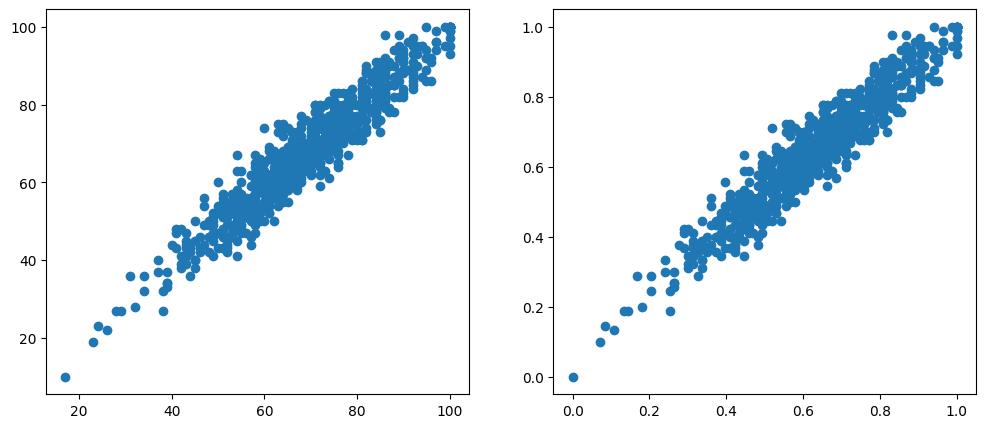

In [26]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['reading score'],x_train['writing score'])
ax2.scatter(x_train_scaled['reading score'],x_train_scaled['writing score'])
plt.show()